<a target="_blank" href="https://colab.research.google.com/github/IngCarlaPezzone/tensorflow-1-public/blob/main/C1/W4/assignment/C1W4_Assignment_traducido.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

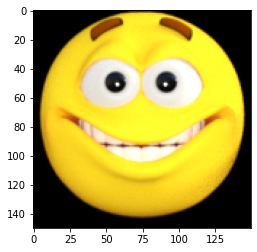

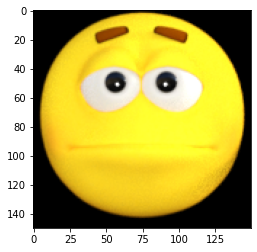

In [2]:
from tensorflow.keras.preprocessing.image import load_img

happy_dir = "/content/sample_data/data/happy"
sad_dir = "/content/sample_data/data/sad"

plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[3])}"))
plt.show()
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import img_to_array

# Cargar el primer ejemplo de una cara feliz
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convierte la imagen en su representación de matriz numpy
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator():
    train_datagen = ImageDataGenerator(rescale=1/255)
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    train_generator = train_datagen.flow_from_directory(
        directory = "/content/sample_data",
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')
    return train_generator

In [21]:
# Guarda tu generador en una variable
gen = image_generator()

Found 80 images belonging to 2 classes.


In [22]:
from tensorflow.keras import optimizers, losses

def train_happy_sad_model(train_generator):
    callbacks = myCallback()

    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=0.001),
                  metrics=['accuracy']) 

    history = model.fit(x=train_generator,
                        epochs=20,
                        callbacks=[callbacks]
                       ) 

    return history

In [23]:
hist = train_happy_sad_model(gen)

Epoch 1/20
8/8 [==============================] - 1s 22ms/step - loss: 0.1075 - accuracy: 0.8750
Epoch 2/20
6/8 [=====================>........] - ETA: 0s - loss: 5.5246e-14 - accuracy: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 0s 23ms/step - loss: 5.7112e-14 - accuracy: 1.0000


In [24]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")
if not "accuracy" in hist.model.metrics_names:
    print("Use 'accuracy' as metric when compiling your model.")
else:
    print("The metric was correctly defined.")

Your model reached the desired accuracy after 2 epochs
The metric was correctly defined.
